In [107]:
#from fbprophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [111]:
def get_model_list():
    model_list = [('DecisionTree', DecisionTreeRegressor()), ('NeuralNetwork', MLPRegressor(shuffle=False)), ('LinearModel', LinearRegression()), ('PolyLinearModel', LinearRegression())] 
    return model_list

def compare_models(model_list, df):
    score_list = list()
    X = np.array(df.index.values.reshape(-1,1))
    for model in model_list:
        score_dict = dict()
        df['stock_tech'].fillna(method='backfill', inplace=True)
        score = cross_validate(model[1], X, df['stock_tech'], return_estimator=True)
        score_dict['model_name'] = model[0]
        score_dict['MSE'] = sum(abs(score['test_score']))/len(score['test_score'])
        score_dict['estimator'] = score['estimator']
        score_list.append(score_dict)
    return score_list


In [112]:
PATH = Path().absolute().parent.parent.joinpath('res', 'pipeline', 'scaled_pre_corona_df.csv')
df = pd.read_csv(PATH)
X = np.array(df.index.values.reshape(-1,1))
model_list = get_model_list()
score_list = compare_models(model_list, df)
least_mse = np.inf  
best_model_name = ''
best_model = None
for score_dict in score_list:
    if score_dict['MSE'] < least_mse:
        least_mse = score_dict['MSE']
        best_model_name = score_dict['model_name']
        best_model = score_dict['estimator']
print('The best model with 5-fold cross validation was {} with an MSE of {}'.format(best_model_name, least_mse))

The best model with 5-fold cross validation was LinearModel with an MSE of 3.813992742027692


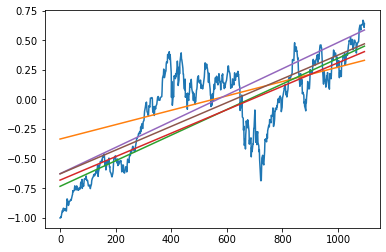

In [113]:
plt.plot(df.index.values, df['stock_tech'])
for model in best_model:
    plt.plot(df.index.values, model.predict(X))